Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Level           200 non-null    int64  
 4   BMI                    200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000     

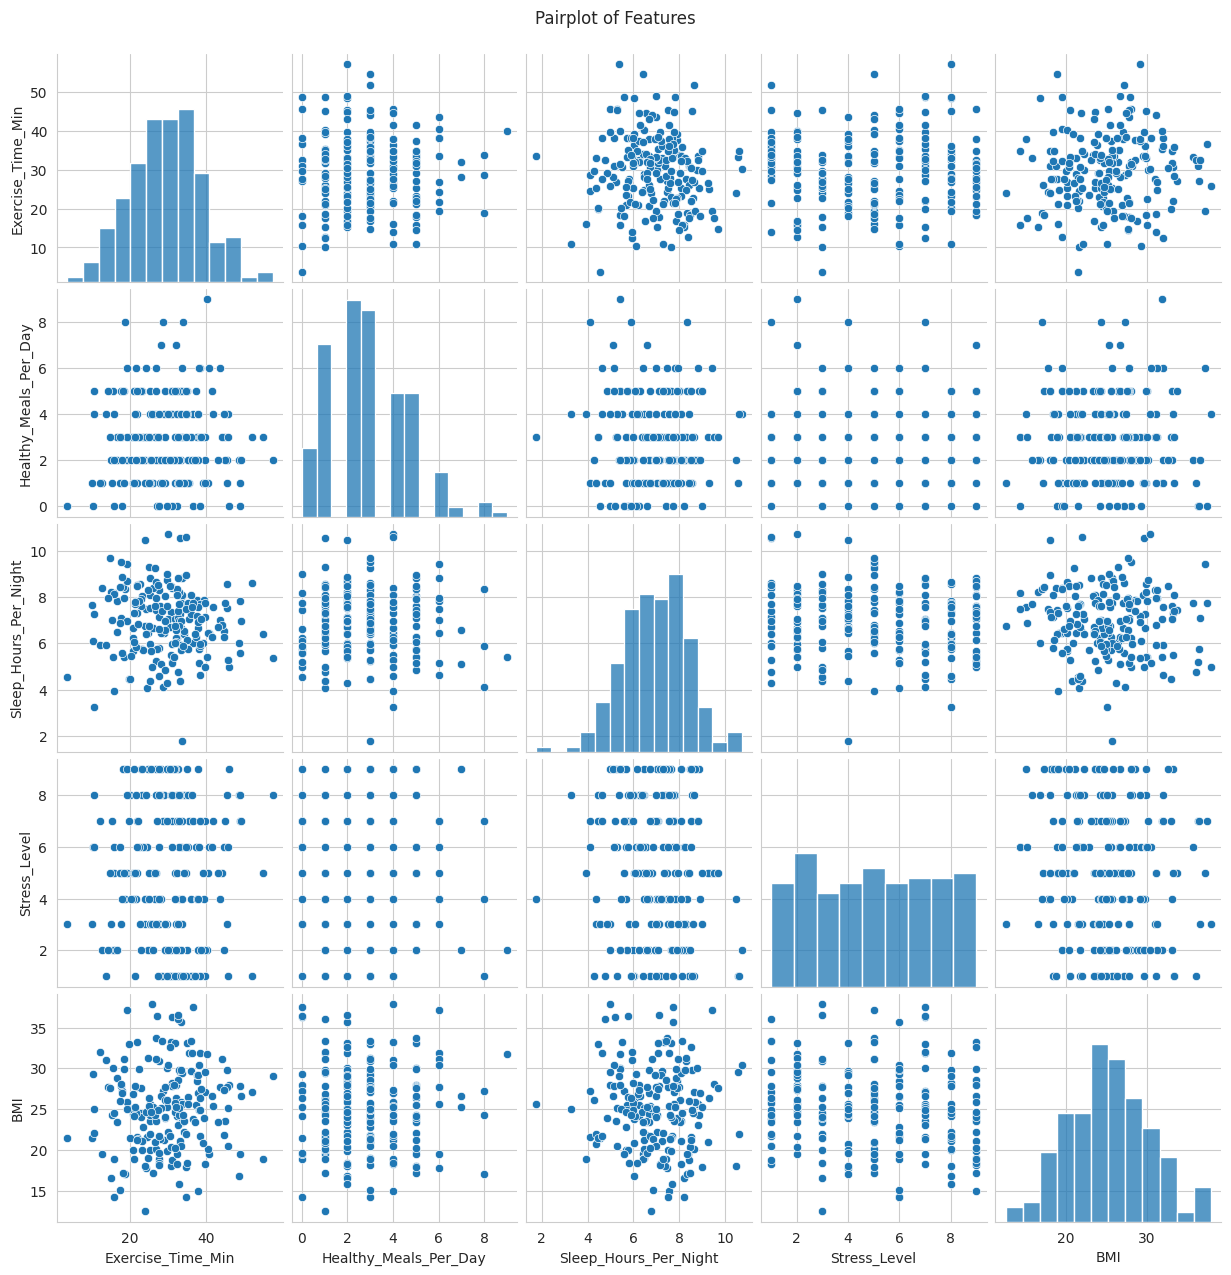


Missing values per column:
Exercise_Time_Min        0
Healthy_Meals_Per_Day    0
Sleep_Hours_Per_Night    0
Stress_Level             0
BMI                      0
dtype: int64

Generating histograms for numerical features...


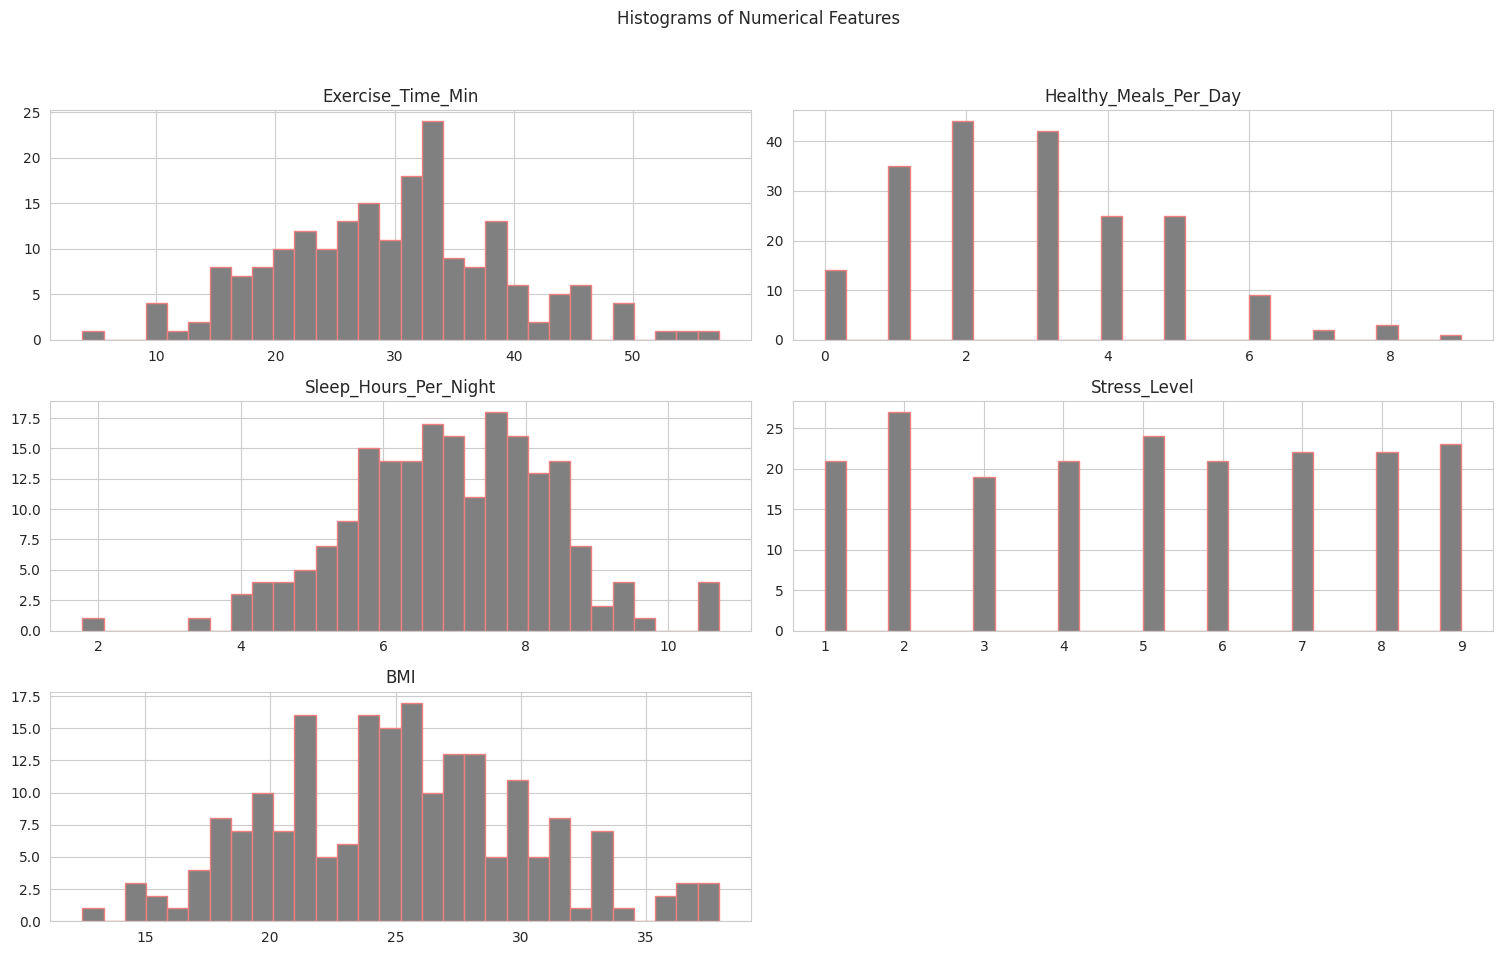


Generating correlation heatmap...


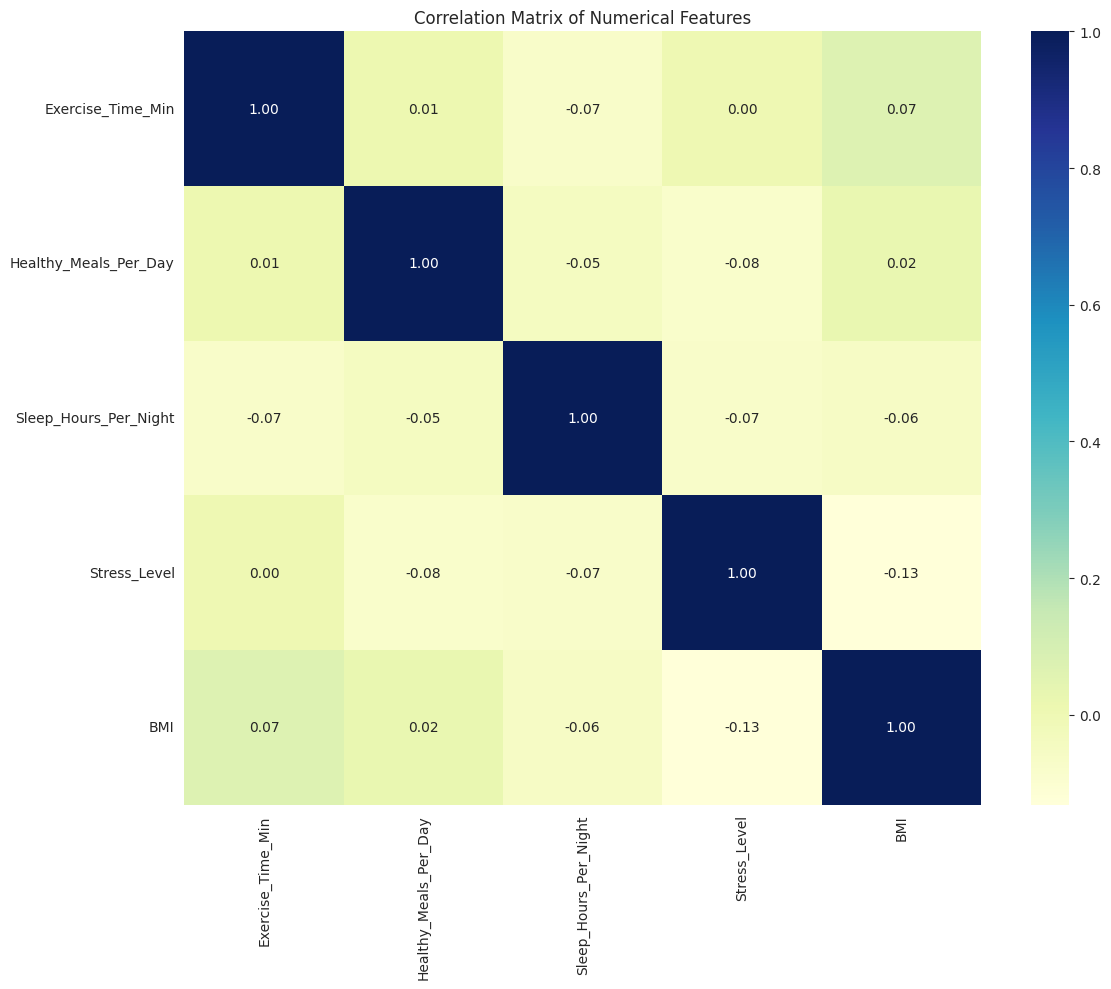

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style("whitegrid")

# Load dataset
file_path = '/content/drive/MyDrive/simulated_health_wellness_data.csv'
df = pd.read_csv(file_path)

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())
print("Coulmn Names:", df.columns)


# EDA
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize distributions of numerical features using histograms
print("\nGenerating histograms for numerical features...")
df.hist(bins=30, figsize=(15, 10), color='gray', edgecolor='lightcoral')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('numerical_features_histograms.png')
plt.show()


# Visualize correlations (if numerical features are present)
if df.select_dtypes(include=np.number).shape[1] > 1:
    print("\nGenerating correlation heatmap...")
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title("Correlation Matrix of Numerical Features")
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()

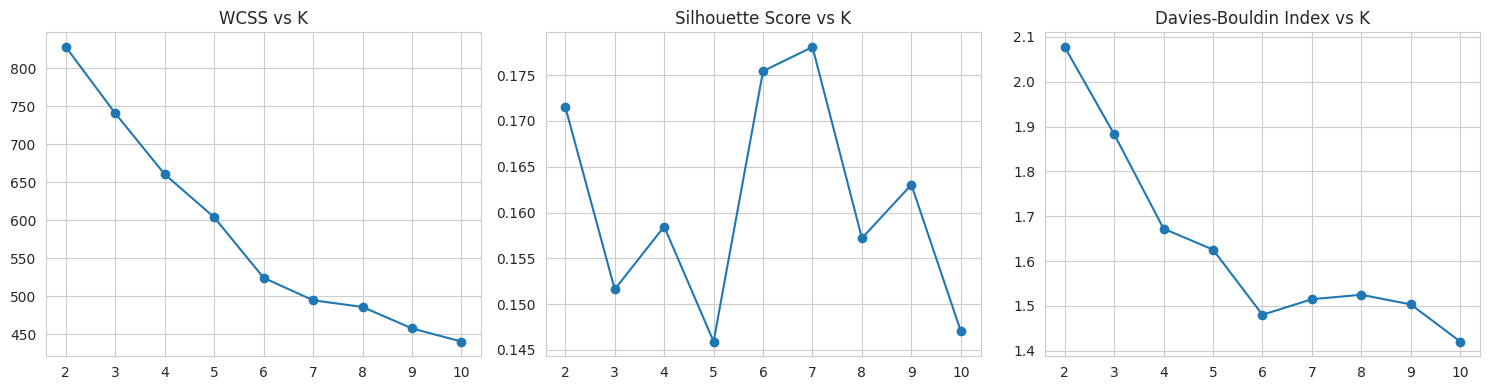

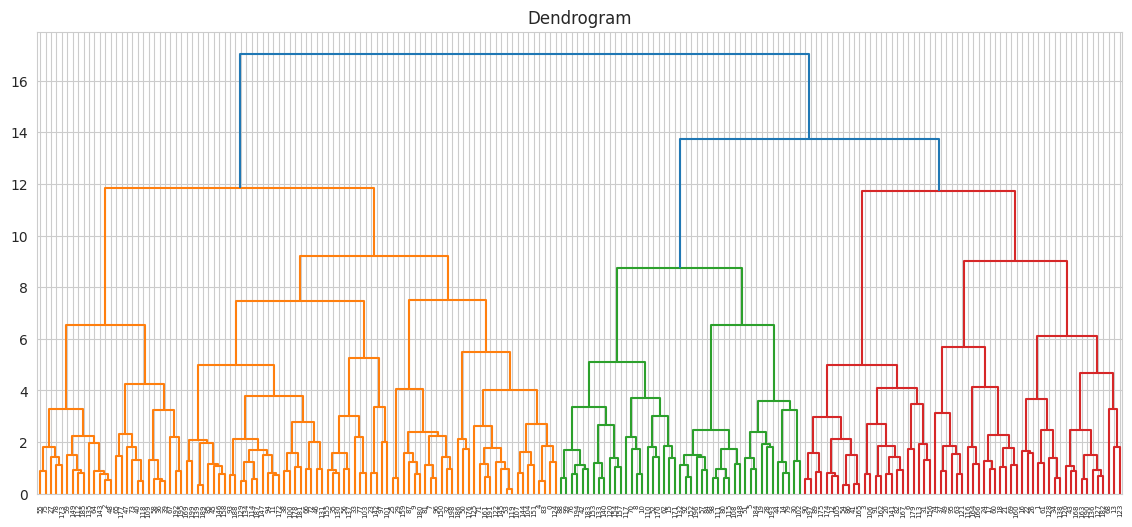

In [6]:
# KMeans Evaluation Function
def evaluate_kmeans(data, max_k=10):
    wcss, silhouette_scores, db_scores = [], [], []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))
        db_scores.append(davies_bouldin_score(data, labels))
    return wcss, silhouette_scores, db_scores

# Evaluate KMeans
wcss, silhouette_scores, db_scores = evaluate_kmeans(scaled_data)

# Plot metrics
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title("WCSS vs K")
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.subplot(1, 3, 3)
plt.plot(range(2, 11), db_scores, marker='o')
plt.title("Davies-Bouldin Index vs K")
plt.tight_layout()
plt.show()

# Apply KMeans and Agglomerative Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(scaled_data)



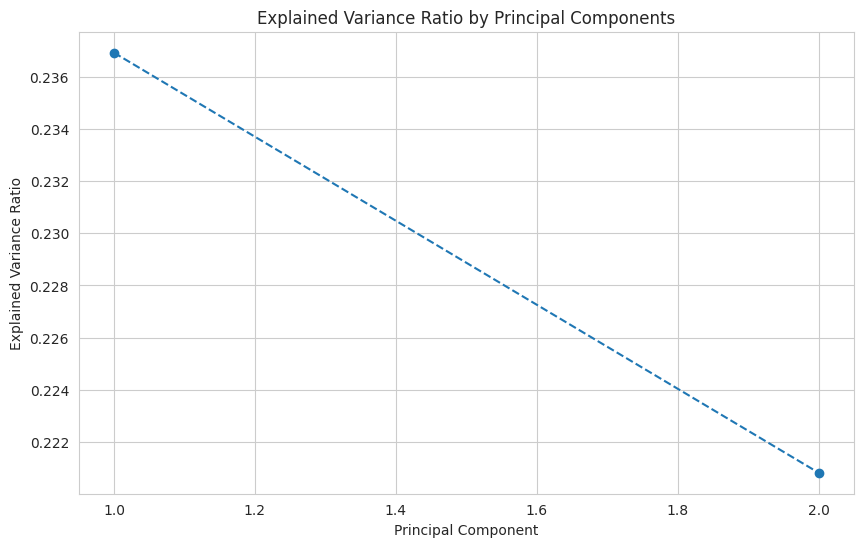

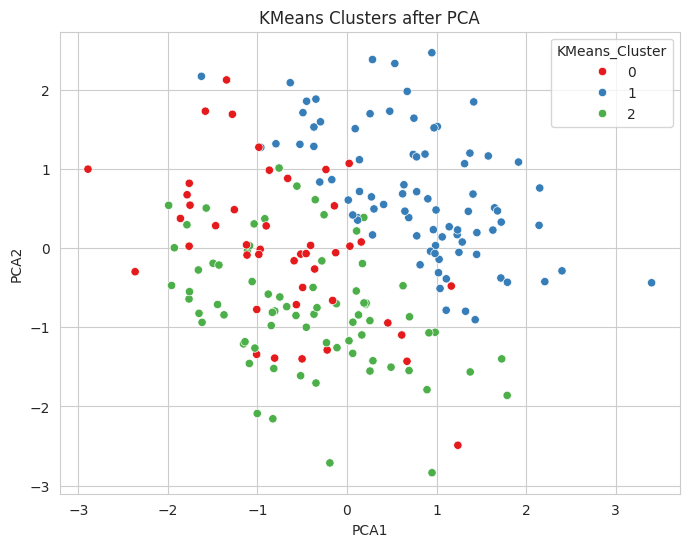

In [7]:
# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

# Explained Variance Ratio Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1')
plt.title("KMeans Clusters after PCA")
plt.show()

# Evaluate KMeans on PCA data
wcss_pca, silhouette_pca, db_pca = evaluate_kmeans(pca_data)



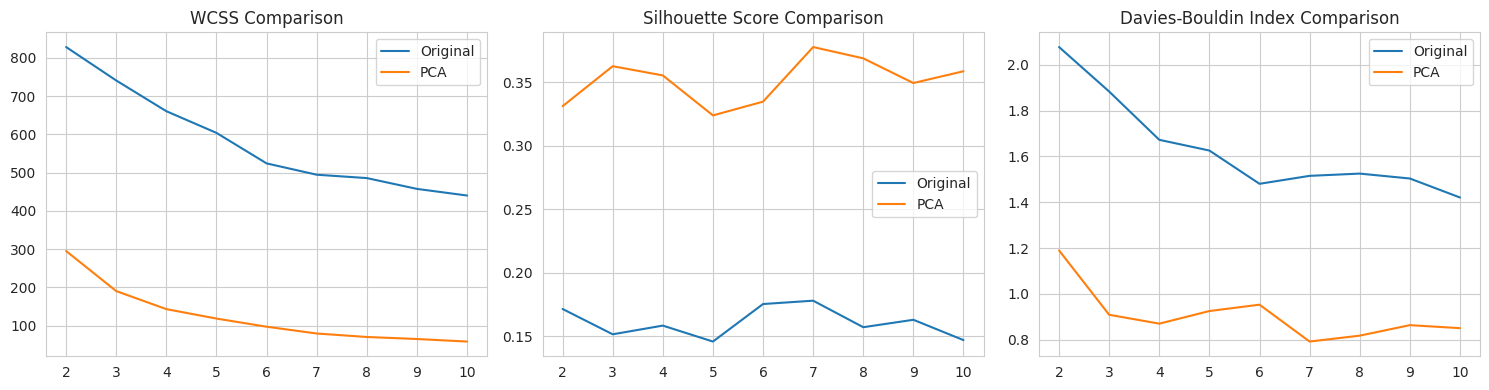

In [8]:
# Compare metrics
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, label='Original')
plt.plot(range(2, 11), wcss_pca, label='PCA')
plt.title("WCSS Comparison")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, label='Original')
plt.plot(range(2, 11), silhouette_pca, label='PCA')
plt.title("Silhouette Score Comparison")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), db_scores, label='Original')
plt.plot(range(2, 11), db_pca, label='PCA')
plt.title("Davies-Bouldin Index Comparison")
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Tabular comparison of clustering metrics
import pandas as pd

# Define the range of K values
k_values = list(range(2, 11))

# Create a DataFrame to compare metrics
comparison_df = pd.DataFrame({
    'K': k_values,
    'WCSS_Original': wcss,
    'WCSS_PCA': wcss_pca,
    'Silhouette_Original': silhouette_scores,
    'Silhouette_PCA': silhouette_pca,
    'DaviesBouldin_Original': db_scores,
    'DaviesBouldin_PCA': db_pca
})

# Display the comparison table
print("Tabular Comparison of Clustering Metrics (Original vs PCA):")
display(comparison_df)


Tabular Comparison of Clustering Metrics (Original vs PCA):


,K,WCSS_Original,WCSS_PCA,Silhouette_Original,Silhouette_PCA,DaviesBouldin_Original,DaviesBouldin_PCA
0,2,827.808262,295.138171,0.171531,0.331090,2.077232,1.189461
1,3,740.466268,190.588109,0.151616,0.362561,1.883030,0.908609
2,4,660.294485,143.487728,0.158465,0.355311,1.672295,0.869883
3,5,603.668581,118.841771,0.145910,0.323852,1.625490,0.924918
4,6,524.027301,97.582756,0.175439,0.334677,1.480315,0.952706
5,7,494.471806,79.861187,0.178063,0.377625,1.515032,0.791729
6,8,485.689693,70.756536,0.157194,0.368741,1.524881,0.817490
7,9,457.452943,65.472950,0.163036,0.349315,1.503435,0.863315
8,10,440.131093,58.832519,0.147042,0.358585,1.420616,0.850248


In [10]:
# Evaluate Agglomerative Clustering for a range of cluster numbers
def evaluate_agglomerative(data, max_k=10):
    silhouette_scores, db_scores = [], []
    for k in range(2, max_k+1):
        agglo = AgglomerativeClustering(n_clusters=k)
        labels = agglo.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
        db_scores.append(davies_bouldin_score(data, labels))
    return silhouette_scores, db_scores

# Evaluate on original and PCA-reduced data
agglo_silhouette, agglo_db = evaluate_agglomerative(scaled_data)
agglo_silhouette_pca, agglo_db_pca = evaluate_agglomerative(pca_data)

# Create a summary DataFrame for comparison
k_values = list(range(2, 11))
comparison_table = pd.DataFrame({
    'K': k_values,
    'KMeans_Silhouette_Original': silhouette_scores,
    'KMeans_Silhouette_PCA': silhouette_pca,
    'Agglo_Silhouette_Original': agglo_silhouette,
    'Agglo_Silhouette_PCA': agglo_silhouette_pca,
    'KMeans_DB_Original': db_scores,
    'KMeans_DB_PCA': db_pca,
    'Agglo_DB_Original': agglo_db,
    'Agglo_DB_PCA': agglo_db_pca
})

# Display the comparison table
print("Tabular Comparison of Clustering Metrics (KMeans vs Agglomerative, Original vs PCA):")
display(comparison_table)


Tabular Comparison of Clustering Metrics (KMeans vs Agglomerative, Original vs PCA):


,K,KMeans_Silhouette_Original,KMeans_Silhouette_PCA,Agglo_Silhouette_Original,Agglo_Silhouette_PCA,KMeans_DB_Original,KMeans_DB_PCA,Agglo_DB_Original,Agglo_DB_PCA
0,2,0.171531,0.331090,0.146478,0.289194,2.077232,1.189461,2.292170,1.279935
1,3,0.151616,0.362561,0.136285,0.334403,1.883030,0.908609,2.070723,0.948488
2,4,0.158465,0.355311,0.114392,0.334950,1.672295,0.869883,1.855166,0.874136
3,5,0.145910,0.323852,0.125221,0.309228,1.625490,0.924918,1.643576,0.956107
4,6,0.175439,0.334677,0.127563,0.322027,1.480315,0.952706,1.706642,0.949175
5,7,0.178063,0.377625,0.135735,0.303777,1.515032,0.791729,1.628361,0.857378
6,8,0.157194,0.368741,0.142004,0.318887,1.524881,0.817490,1.624615,0.815225
7,9,0.163036,0.349315,0.142850,0.326447,1.503435,0.863315,1.568651,0.791463
8,10,0.147042,0.358585,0.146508,0.326606,1.420616,0.850248,1.496935,0.867932


In [11]:
# MERGED Code

import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate Agglomerative Clustering for a range of cluster numbers
def evaluate_agglomerative(data, max_k=10):
    silhouette_scores, db_scores = [], []
    for k in range(2, max_k+1):
        agglo = AgglomerativeClustering(n_clusters=k)
        labels = agglo.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
        db_scores.append(davies_bouldin_score(data, labels))
    return silhouette_scores, db_scores

# Evaluate Agglomerative Clustering on original and PCA-reduced data
agglo_silhouette, agglo_db = evaluate_agglomerative(scaled_data)
agglo_silhouette_pca, agglo_db_pca = evaluate_agglomerative(pca_data)

# Define the range of K values
k_values = list(range(2, 11))

# Create a unified DataFrame to compare all metrics
comparison_df = pd.DataFrame({
    'K': k_values,
    'KMeans_WCSS_Original': wcss,
    'KMeans_WCSS_PCA': wcss_pca,
    'KMeans_Silhouette_Original': silhouette_scores,
    'KMeans_Silhouette_PCA': silhouette_pca,
    'Agglo_Silhouette_Original': agglo_silhouette,
    'Agglo_Silhouette_PCA': agglo_silhouette_pca,
    'KMeans_DB_Original': db_scores,
    'KMeans_DB_PCA': db_pca,
    'Agglo_DB_Original': agglo_db,
    'Agglo_DB_PCA': agglo_db_pca
})

# Display the unified comparison table
print("Unified Comparison of Clustering Metrics (KMeans vs Agglomerative, Original vs PCA):")
display(comparison_df)


Unified Comparison of Clustering Metrics (KMeans vs Agglomerative, Original vs PCA):


,K,KMeans_WCSS_Original,KMeans_WCSS_PCA,KMeans_Silhouette_Original,KMeans_Silhouette_PCA,Agglo_Silhouette_Original,Agglo_Silhouette_PCA,KMeans_DB_Original,KMeans_DB_PCA,Agglo_DB_Original,Agglo_DB_PCA
0,2,827.808262,295.138171,0.171531,0.331090,0.146478,0.289194,2.077232,1.189461,2.292170,1.279935
1,3,740.466268,190.588109,0.151616,0.362561,0.136285,0.334403,1.883030,0.908609,2.070723,0.948488
2,4,660.294485,143.487728,0.158465,0.355311,0.114392,0.334950,1.672295,0.869883,1.855166,0.874136
3,5,603.668581,118.841771,0.145910,0.323852,0.125221,0.309228,1.625490,0.924918,1.643576,0.956107
4,6,524.027301,97.582756,0.175439,0.334677,0.127563,0.322027,1.480315,0.952706,1.706642,0.949175
5,7,494.471806,79.861187,0.178063,0.377625,0.135735,0.303777,1.515032,0.791729,1.628361,0.857378
6,8,485.689693,70.756536,0.157194,0.368741,0.142004,0.318887,1.524881,0.817490,1.624615,0.815225
7,9,457.452943,65.472950,0.163036,0.349315,0.142850,0.326447,1.503435,0.863315,1.568651,0.791463
8,10,440.131093,58.832519,0.147042,0.358585,0.146508,0.326606,1.420616,0.850248,1.496935,0.867932


In [12]:
import pandas as pd
import numpy as np

# Compute mean values for each metric
summary_metrics = {
    'Method': ['KMeans', 'KMeans_PCA', 'Agglo', 'Agglo_PCA'],
    'Mean Silhouette Score': [
        np.mean(silhouette_scores),
        np.mean(silhouette_pca),
        np.mean(agglo_silhouette),
        np.mean(agglo_silhouette_pca)
    ],
    'Mean Davies-Bouldin Index': [
        np.mean(db_scores),
        np.mean(db_pca),
        np.mean(agglo_db),
        np.mean(agglo_db_pca)
    ]
}

# Create DataFrame for clustering metrics
summary_df = pd.DataFrame(summary_metrics)

# Compute mean WCSS for KMeans only
wcss_summary = {
    'Method': ['KMeans', 'KMeans_PCA'],
    'Mean WCSS': [np.mean(wcss), np.mean(wcss_pca)]
}

# Create DataFrame for WCSS
wcss_df = pd.DataFrame(wcss_summary)

# Display the summary tables
print("Summary of Clustering Metrics (Mean Values):")
display(summary_df)

print("\nSummary of WCSS (Mean Values):")
display(wcss_df)


Summary of Clustering Metrics (Mean Values):


,Method,Mean Silhouette Score,Mean Davies-Bouldin Index
0,KMeans,0.160922,1.633592
1,KMeans_PCA,0.351306,0.907595
2,Agglo,0.135226,1.765204
3,Agglo_PCA,0.318391,0.926649



Summary of WCSS (Mean Values):


,Method,Mean WCSS
0,KMeans,581.556715
1,KMeans_PCA,124.506859
